<div class="alert alert-success">  
    <h1 align="center" style="color:darkgoldenrod;">Importing Libraries</h1>  
     
</div>

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
import lightgbm as lgb
import gc
import numpy as np
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

<div class="alert alert-success">  
    <h1 align="center" style="color:darkgoldenrod;">Loading  Dataset </h1>  
     
</div>

In [14]:
df_sub=pd.read_csv("../sample_submission.csv")
df_train=pd.read_csv("../train.csv")
df_test=pd.read_csv("../test.csv")

<div class="alert alert-success">  
    <h1 align="center" style="color:darkgoldenrod;">Check on Data </h1>  
     
</div>

In [15]:
df_extra = pd.read_csv('../Fertilizer Prediction.csv')

In [16]:
df_extra.columns,df_train.columns

(Index(['Temparature', 'Humidity', 'Moisture', 'Soil Type', 'Crop Type',
        'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer Name'],
       dtype='object'),
 Index(['id', 'Temparature', 'Humidity', 'Moisture', 'Soil Type', 'Crop Type',
        'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer Name'],
       dtype='object'))

In [17]:
df_train.head()

,id,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,0,37,70,36,Clayey,Sugarcane,36,4,5,28-28
1,1,27,69,65,Sandy,Millets,30,6,18,28-28
2,2,29,63,32,Sandy,Millets,24,12,16,17-17-17
3,3,35,62,54,Sandy,Barley,39,12,4,10-26-26
4,4,35,58,43,Red,Paddy,37,2,16,DAP


In [18]:
df_test.head()

,id,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous
0,750000,31,70,52,Sandy,Wheat,34,11,24
1,750001,27,62,45,Red,Sugarcane,30,14,15
2,750002,28,72,28,Clayey,Ground Nuts,14,15,4
3,750003,37,53,57,Black,Ground Nuts,18,17,36
4,750004,31,55,32,Red,Pulses,13,19,14


In [19]:
df_test.shape,df_train.shape

((250000, 9), (750000, 10))

In [20]:
df_train = df_train.drop(columns=['id'])
df_test = df_test.drop(columns=['id'])

In [21]:
df_train = pd.concat([df_train, df_extra], ignore_index=True)

<div class="alert alert-success">  
    <h1 align="center" style="color:darkgoldenrod;">Checking - Distribution of categorical features </h1>  
     
</div>

In [23]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850000 entries, 0 to 849999
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Temparature      850000 non-null  int64 
 1   Humidity         850000 non-null  int64 
 2   Moisture         850000 non-null  int64 
 3   Soil Type        850000 non-null  object
 4   Crop Type        850000 non-null  object
 5   Nitrogen         850000 non-null  int64 
 6   Potassium        850000 non-null  int64 
 7   Phosphorous      850000 non-null  int64 
 8   Fertilizer Name  850000 non-null  object
dtypes: int64(6), object(3)
memory usage: 58.4+ MB


In [24]:
categorical_columns = df_train.select_dtypes(include=['object']).columns
unique_values = {col: df_train[col].nunique() for col in categorical_columns}
for col, unique_count in unique_values.items():
    print(f"{col}: {unique_count} unique values")
    
gc.collect()

Soil Type: 5 unique values
Crop Type: 11 unique values
Fertilizer Name: 7 unique values


2661

In [25]:
categorical_columns = df_test.select_dtypes(include=['object']).columns
unique_values = {col: df_test[col].nunique() for col in categorical_columns}
for col, unique_count in unique_values.items():
    print(f"{col}: {unique_count} unique values")
    
gc.collect()

Soil Type: 5 unique values
Crop Type: 11 unique values


0

In [26]:
df_test.columns

Index(['Temparature', 'Humidity', 'Moisture', 'Soil Type', 'Crop Type',
       'Nitrogen', 'Potassium', 'Phosphorous'],
      dtype='object')

In [27]:
df_train.columns

Index(['Temparature', 'Humidity', 'Moisture', 'Soil Type', 'Crop Type',
       'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer Name'],
      dtype='object')

<div class="alert alert-success">  
    <h1 align="center" style="color:darkgoldenrod;">Exploratory Data Analysis (EDA) </h1>  
     
</div>

In [28]:
import seaborn as sns

In [29]:
missing_train = df_train.isna().mean() * 100
missing_test = df_test.isna().mean() * 100

print("Columns in df_train with more than 10% missing values:")
print(missing_train[missing_train > 0])

print("\nColumns in df_test with more than 10% missing values:")
print(missing_test[missing_test > 0])

Columns in df_train with more than 10% missing values:
Series([], dtype: float64)

Columns in df_test with more than 10% missing values:
Series([], dtype: float64)


In [30]:
missing_values = df_train.isnull().sum()
missing_values = missing_values[missing_values > 0]

if not missing_values.empty:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=missing_values.index, y=missing_values.values, palette='viridis')
    plt.xticks(rotation=90)
    plt.xlabel('Features')
    plt.ylabel('Missing Values')
    plt.title('Missing Values per Feature')
    plt.tight_layout()
    plt.show()
else:
    print("✅ No missing values found in the dataset.")

✅ No missing values found in the dataset.


In [31]:
!pip install dython

  Using cached setuptools-80.9.0-py3-none-any.whl.metadata (6.6 kB)
Using cached setuptools-80.9.0-py3-none-any.whl (1.2 MB)

   ---------------------------------------- 0/2 [setuptools]
   ---------------------------------------- 0/2 [setuptools]
   ---------------------------------------- 0/2 [setuptools]
   ---------------------------------------- 0/2 [setuptools]
   ---------------------------------------- 0/2 [setuptools]
   ---------------------------------------- 0/2 [setuptools]
   -------------------- ------------------- 1/2 [dython]
   ---------------------------------------- 2/2 [dython]



In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
import category_encoders as ce

missing_threshold = 0.95

high_missing_columns = df_train.columns[df_train.isnull().mean() > missing_threshold]

df_train = df_train.drop(columns=high_missing_columns)
df_test = df_test.drop(columns=high_missing_columns)
target = 'class'

for column in df_train.columns:
    if df_train[column].isnull().any():      
        if df_train[column].dtype == 'object':
            mode_value = df_train[column].mode()[0]
            df_train[column].fillna(mode_value, inplace=True)
            df_test[column].fillna(mode_value, inplace=True)     
        else:
            median_value = df_train[column].median()
            df_train[column].fillna(median_value, inplace=True)
            df_test[column].fillna(median_value, inplace=True)

c:\Users\muham\OneDrive\Belgeler\Github_Projeler\Kaggle_Competition\.venv\Lib\site-packages\dython\__init__.py:6: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import get_distribution


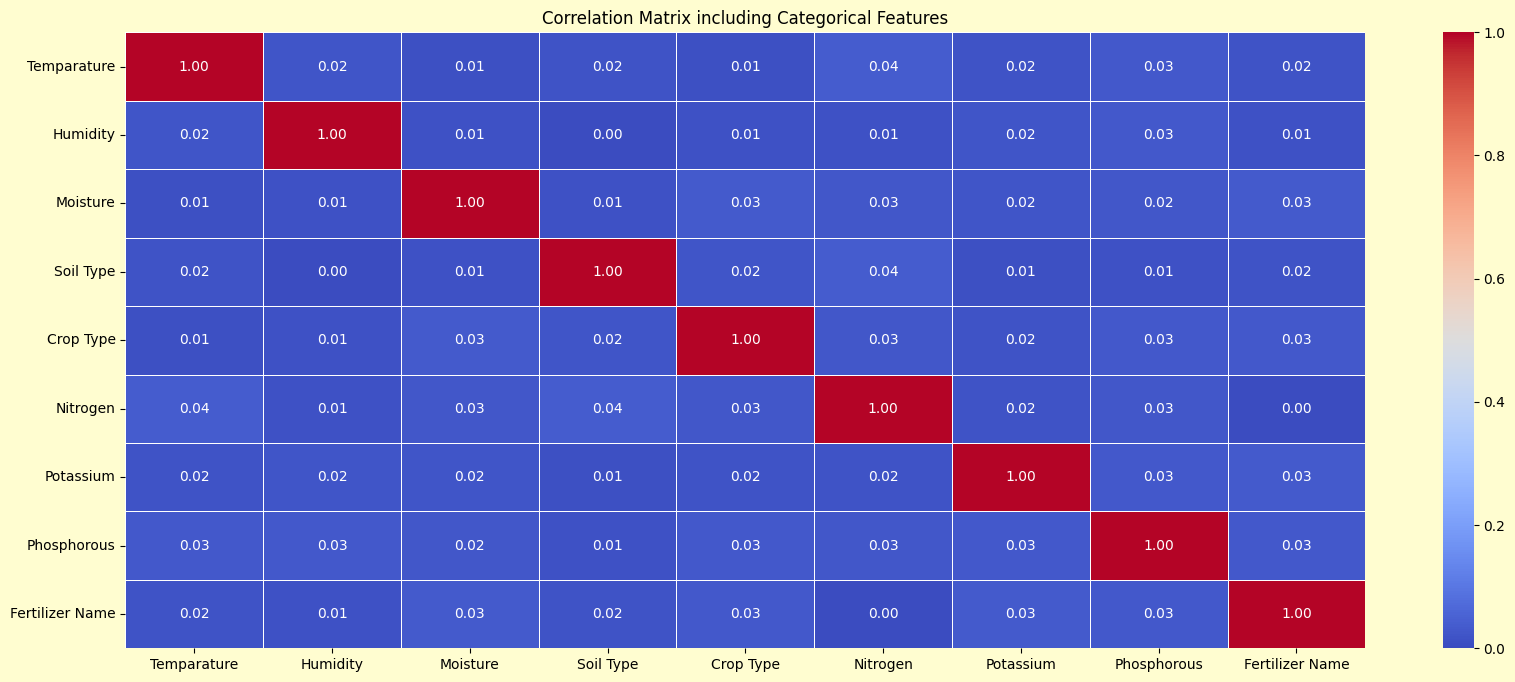

In [35]:
from dython.nominal import associations

associations_df = associations(df_train[:10000], nominal_columns='all', plot=False)
corr_matrix = associations_df['corr']
plt.figure(figsize=(20, 8))
plt.gcf().set_facecolor('#FFFDD0') 
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix including Categorical Features')
plt.show()

In [36]:
df_train.columns

Index(['Temparature', 'Humidity', 'Moisture', 'Soil Type', 'Crop Type',
       'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer Name'],
      dtype='object')

In [37]:
cat_cols_train = df_train.select_dtypes(include=['object']).columns
cat_cols_train = cat_cols_train[cat_cols_train != 'Fertilizer Name']
ordinal_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

df_train[cat_cols_train] = ordinal_encoder.fit_transform(df_train[cat_cols_train].astype(str))
df_test[cat_cols_train] = ordinal_encoder.transform(df_test[cat_cols_train].astype(str))

In [38]:
df_train.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,37,70,36,1.0,8.0,36,4,5,28-28
1,27,69,65,4.0,4.0,30,6,18,28-28
2,29,63,32,4.0,4.0,24,12,16,17-17-17
3,35,62,54,4.0,0.0,39,12,4,10-26-26
4,35,58,43,3.0,6.0,37,2,16,DAP


In [39]:
df_test.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous
0,31,70,52,4.0,10.0,34,11,24
1,27,62,45,3.0,8.0,30,14,15
2,28,72,28,1.0,2.0,14,15,4
3,37,53,57,0.0,2.0,18,17,36
4,31,55,32,3.0,7.0,13,19,14


In [40]:
le = LabelEncoder()
df_train['Fertilizer Name'] = le.fit_transform(df_train['Fertilizer Name'])

In [41]:
y = df_train['Fertilizer Name'] 
X = df_train.drop(['Fertilizer Name'],axis=1)

<div class="alert alert-success">  
    <h1 align="center" style="color:darkgoldenrod;">Model Building - Training - Classification </h1>  
     
</div>

In [44]:
train_X, test_X, train_y, test_y = train_test_split(X, y,test_size = 0.2, random_state =42,stratify=y)

In [45]:
params = {
        'objective': 'multi:softprob',  
        'num_class': len(np.unique(y)), 
        'max_depth': 7,
        'learning_rate': 0.03,
        'subsample': 0.8,
        'max_bin': 128,
        'colsample_bytree': 0.3, 
        'colsample_bylevel': 1,  
        'colsample_bynode': 1,  
        'tree_method': 'hist',  
        'random_state': 42,
        'eval_metric': 'mlogloss',
        'device': "cuda",
        'enable_categorical':True,
        'n_estimators':10000,
        'early_stopping_rounds':50,
    }

In [46]:
model = XGBClassifier(
    objective='multi:softprob',
    num_class=len(np.unique(train_y)),
    n_estimators=3200,
    learning_rate=0.045,         
    max_depth=7,                
    colsample_bytree=0.6,       
    colsample_bylevel=0.8,      
    subsample=0.8,
)
model.fit(train_X, train_y)
y_pred_probs = model.predict_proba(test_X)
top_3_preds = np.argsort(y_pred_probs, axis=1)[:, -3:][:, ::-1]  
actual = [[label] for label in test_y]

def mapk(actual, predicted, k=3):
    def apk(a, p, k):
        p = p[:k]
        score = 0.0
        hits = 0
        seen = set()
        for i, pred in enumerate(p):
            if pred in a and pred not in seen:
                hits += 1
                score += hits / (i + 1.0)
                seen.add(pred)
        return score / min(len(a), k)
    return np.mean([apk(a, p, k) for a, p in zip(actual, predicted)])
map3_score = mapk(actual, top_3_preds)
print(f"✅ MAP@3 Score: {map3_score:.5f}")

✅ MAP@3 Score: 0.35677


<div class="alert alert-success">  
    <h1 align="center" style="color:darkgoldenrod;">Classification Analysis </h1>  
     
</div>

In [49]:
import lime
import lime.lime_tabular

In [50]:
redict_fn_xgb = lambda x: model.predict_proba(x).astype(float)
X = train_X.values
explainer = lime.lime_tabular.LimeTabularExplainer(X,feature_names = train_X.columns,kernel_width=5)

In [51]:
df_test.head(4)

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous
0,31,70,52,4.0,10.0,34,11,24
1,27,62,45,3.0,8.0,30,14,15
2,28,72,28,1.0,2.0,14,15,4
3,37,53,57,0.0,2.0,18,17,36


In [52]:
df_test.loc[[3]]

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous
3,37,53,57,0.0,2.0,18,17,36


In [53]:
test_X

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous
200654,29,64,60,4.0,3.0,39,4,28
192348,36,71,28,3.0,4.0,20,8,12
342924,29,63,46,3.0,8.0,40,11,13
612367,27,53,34,3.0,9.0,5,10,30
75674,32,68,46,1.0,10.0,10,16,18
...,...,...,...,...,...,...,...,...
455283,35,72,33,3.0,0.0,38,4,21
479677,38,62,51,0.0,10.0,11,11,35
834802,38,53,57,0.0,10.0,26,18,17
210310,32,53,63,3.0,2.0,37,12,3


In [54]:
choosen_instance = test_X.loc[[15066]].values[0]
exp = explainer.explain_instance(choosen_instance, redict_fn_xgb,num_features=15)
exp.show_in_notebook(show_all=False)

ImportError: cannot import name 'display' from 'IPython.core.display' (c:\Users\muham\OneDrive\Belgeler\Github_Projeler\Kaggle_Competition\.venv\Lib\site-packages\IPython\core\display.py)

<div class="alert alert-success">  
    <h1 align="center" style="color:darkgoldenrod;">Final Submission </h1>  
     
</div>

In [55]:
test_probs = model.predict_proba(df_test)
top_3_preds = np.argsort(test_probs, axis=1)[:, -3:][:, ::-1]
top_3_labels = le.inverse_transform(top_3_preds.ravel()).reshape(top_3_preds.shape)
submission = pd.DataFrame({
    'id': df_sub['id'],
    'Fertilizer Name': [' '.join(row) for row in top_3_labels]
})
submission.to_csv('submission_v4.csv', index=False)
print("✅ Submission file saved as 'submission_v4.csv'")

✅ Submission file saved as 'submission_v3.csv'
